# EDA

## Cargar Librerias

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Cargar datos

In [27]:
# Cargar el dataset preprocesado
file_path = "../data/raw/workout_fitness_tracker_data.csv"
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

No hay datos nulos

In [28]:
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


In [29]:
# Eliminar columnas con el mismo valor en todas las filas
columns_to_drop = df.columns[df.nunique() == 1]
df_cleaned = df.drop(columns=columns_to_drop)

# Mostrar las columnas eliminadas
print(f"Columnas eliminadas: {columns_to_drop.tolist()}")

# Mostrar el dataframe limpio
df_cleaned.head()

Columnas eliminadas: ['Water Intake (liters)', 'VO2 Max', 'Body Fat (%)']


,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,3195,61,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,2541,73,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,3362,80,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,2071,65,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,3298,59,Stressed,Energized


In [30]:
df = df_cleaned

## Distribucion de variables

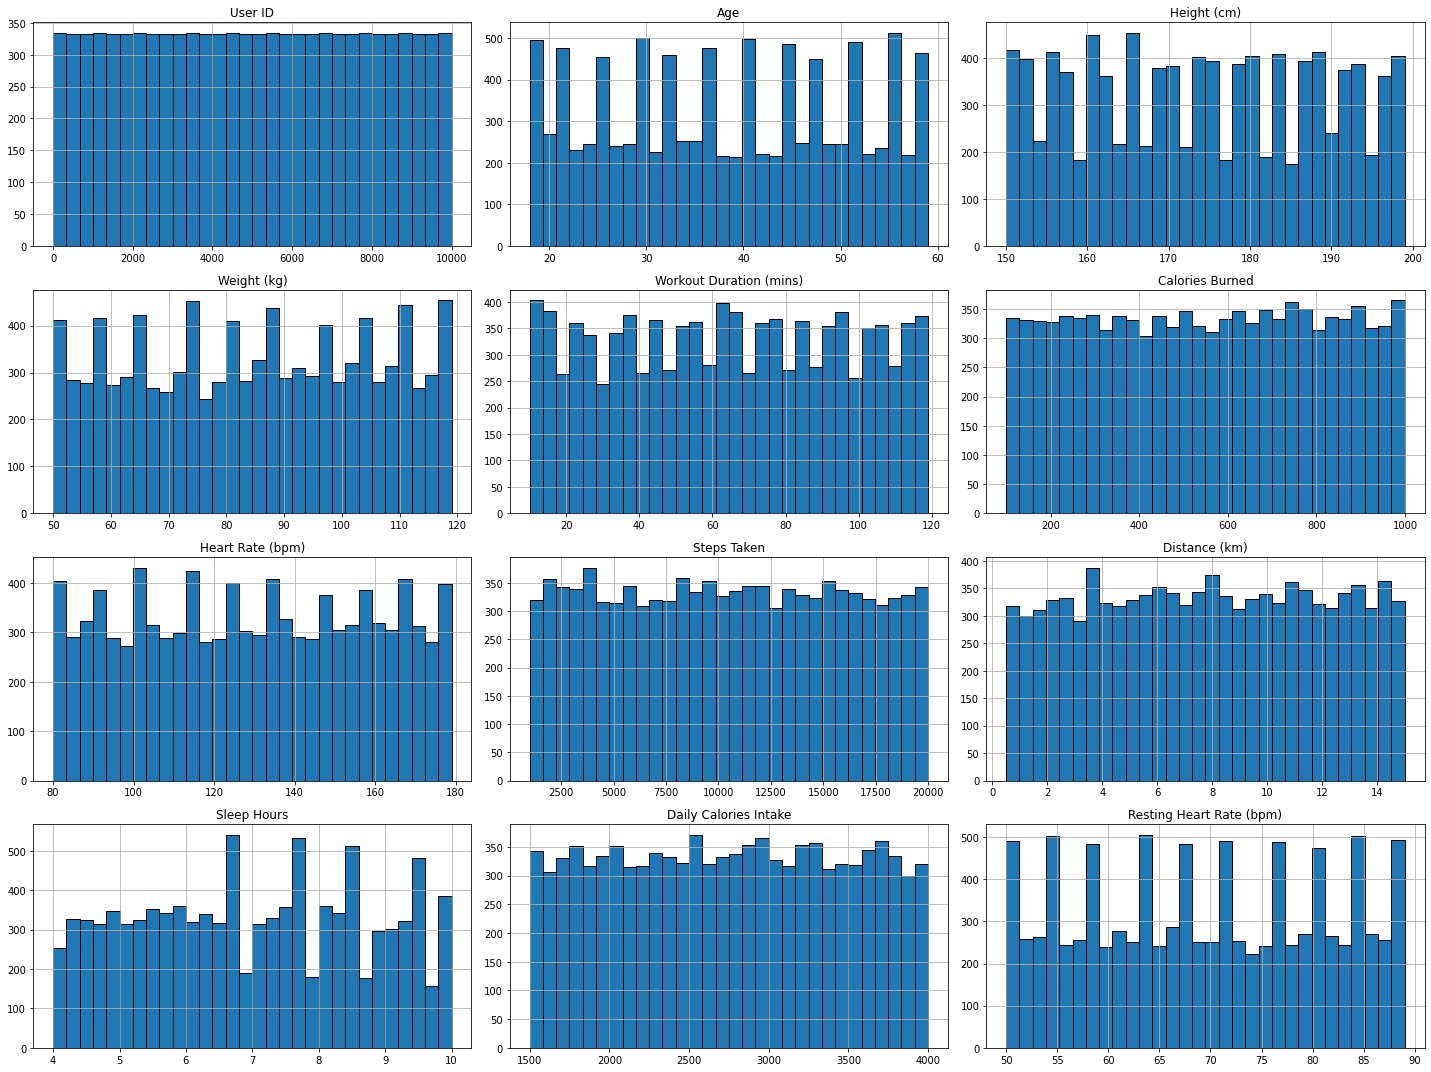

In [31]:
# Visualizar distribución de variables numéricas
df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

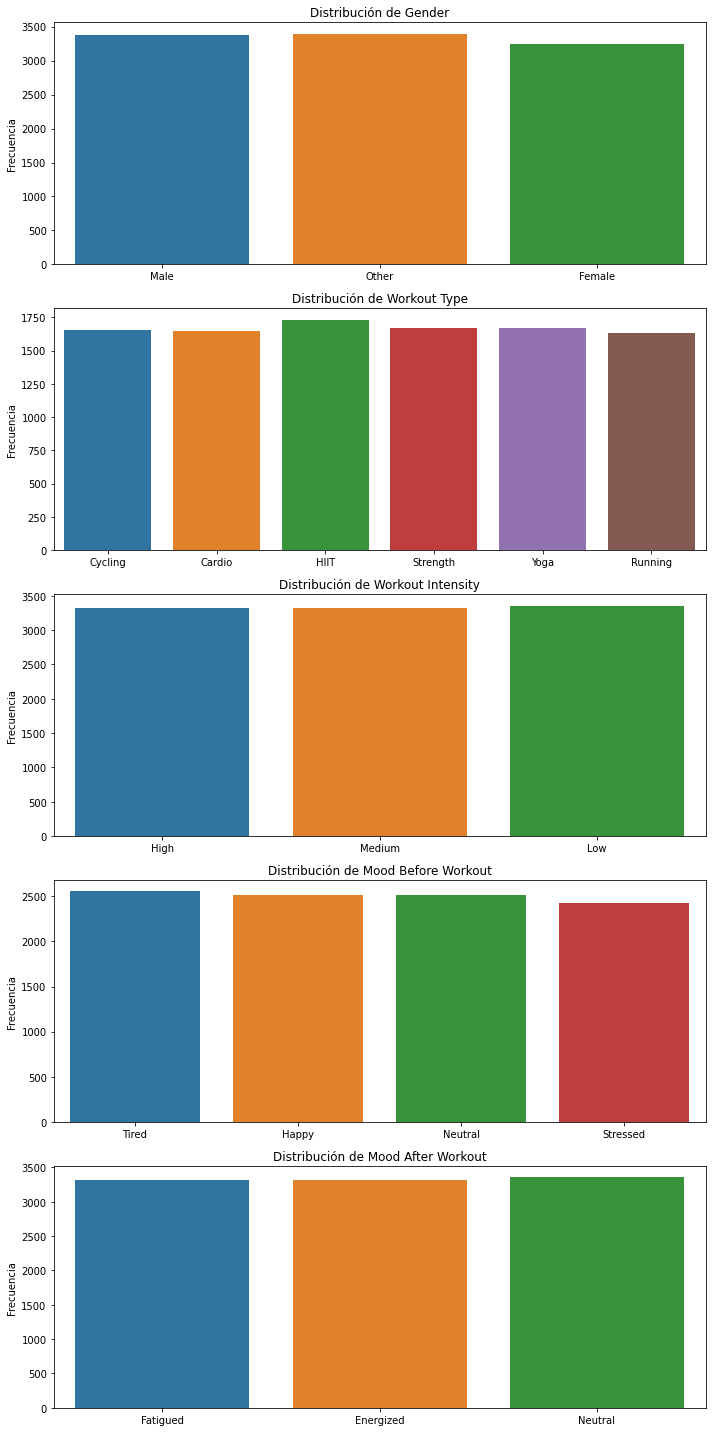

In [32]:
# Visualizar distribución de variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 20))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

C:\Users\nicol\AppData\Local\Temp/ipykernel_2664/2280710009.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


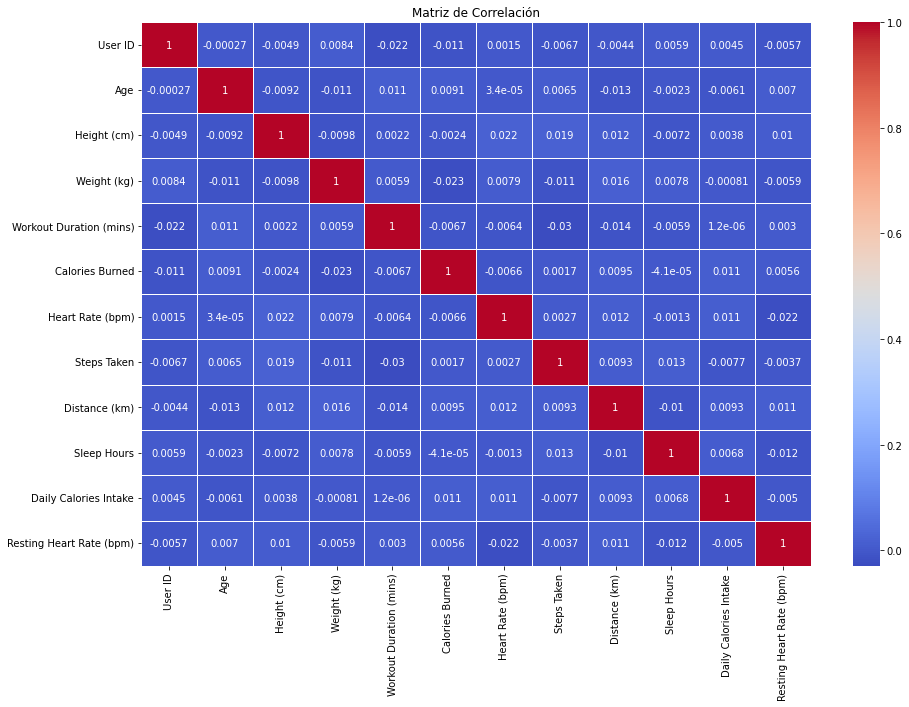

In [33]:
# Generar la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

Podemos observar que no hay correlaciones fuertes.

In [34]:
# Seleccionar variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(numeric_columns)

Index(['User ID', 'Age', 'Height (cm)', 'Weight (kg)',
       'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)',
       'Steps Taken', 'Distance (km)', 'Sleep Hours', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)'],
      dtype='object')


## Creacion de nuevas variables

In [35]:
# Índice de Masa Corporal (IMC o BMI)
df['BMI'] = df['Weight (kg)'] / (df['Height (cm)'] / 100) ** 2
# Ratio de Frecuencia Cardíaca
df['Heart Rate Ratio'] = df['Heart Rate (bpm)'] / df['Resting Heart Rate (bpm)']
# Diferencia de Frecuencia Cardíaca
df['HR Change'] = df['Heart Rate (bpm)'] - df['Resting Heart Rate (bpm)']
# Calorías Quemadas por Minuto
df['Calories Per Minute'] = df['Calories Burned'] / df['Workout Duration (mins)']
# Pasos por Minuto
df['Steps Per Minute'] = df['Steps Taken'] / df['Workout Duration (mins)']

# Déficit o Exceso de Calorías
df['Calorie Balance'] = df['Daily Calories Intake'] - df['Calories Burned']

# Impacto del Sueño en el Rendimiento
df['Sleep to Performance'] = df['Calories Burned'] / df['Sleep Hours']
# Clasificación de Intensidad de Entrenamiento
def categorize_intensity(row):
    if row['Calories Burned'] < 200 and row['Workout Duration (mins)'] < 30:
        return 'Baja Intensidad'
    elif row['Calories Burned'] < 500 and row['Workout Duration (mins)'] < 60:
        return 'Media Intensidad'
    else:
        return 'Alta Intensidad'
df['Workout Intensity Category'] = df.apply(categorize_intensity, axis=1)
# Impacto del Entrenamiento en el Estado de Ánimo
df['Mood Impact'] = df['Mood After Workout'] + " - " + df['Mood Before Workout']

In [36]:
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,...,Mood After Workout,BMI,Heart Rate Ratio,HR Change,Calories Per Minute,Steps Per Minute,Calorie Balance,Sleep to Performance,Workout Intensity Category,Mood Impact
0,1,39,Male,175,99,Cycling,79,384,112,8850,...,Fatigued,32.326531,1.836066,51,4.860759,112.025316,2811,46.829268,Alta Intensidad,Fatigued - Tired
1,2,36,Other,157,112,Cardio,73,612,168,2821,...,Energized,45.437949,2.301370,95,8.383562,38.643836,1929,71.162791,Alta Intensidad,Energized - Happy
2,3,25,Female,180,66,HIIT,27,540,133,18898,...,Fatigued,20.370370,1.662500,53,20.000000,699.925926,2822,55.102041,Alta Intensidad,Fatigued - Happy
3,4,56,Male,154,89,Cycling,39,672,118,14102,...,Neutral,37.527408,1.815385,53,17.230769,361.589744,1399,115.862069,Alta Intensidad,Neutral - Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,...,Energized,15.676480,2.881356,111,7.321429,294.964286,2888,56.164384,Media Intensidad,Energized - Stressed


C:\Users\nicol\AppData\Local\Temp/ipykernel_2664/188727323.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_filtered = df.corr()


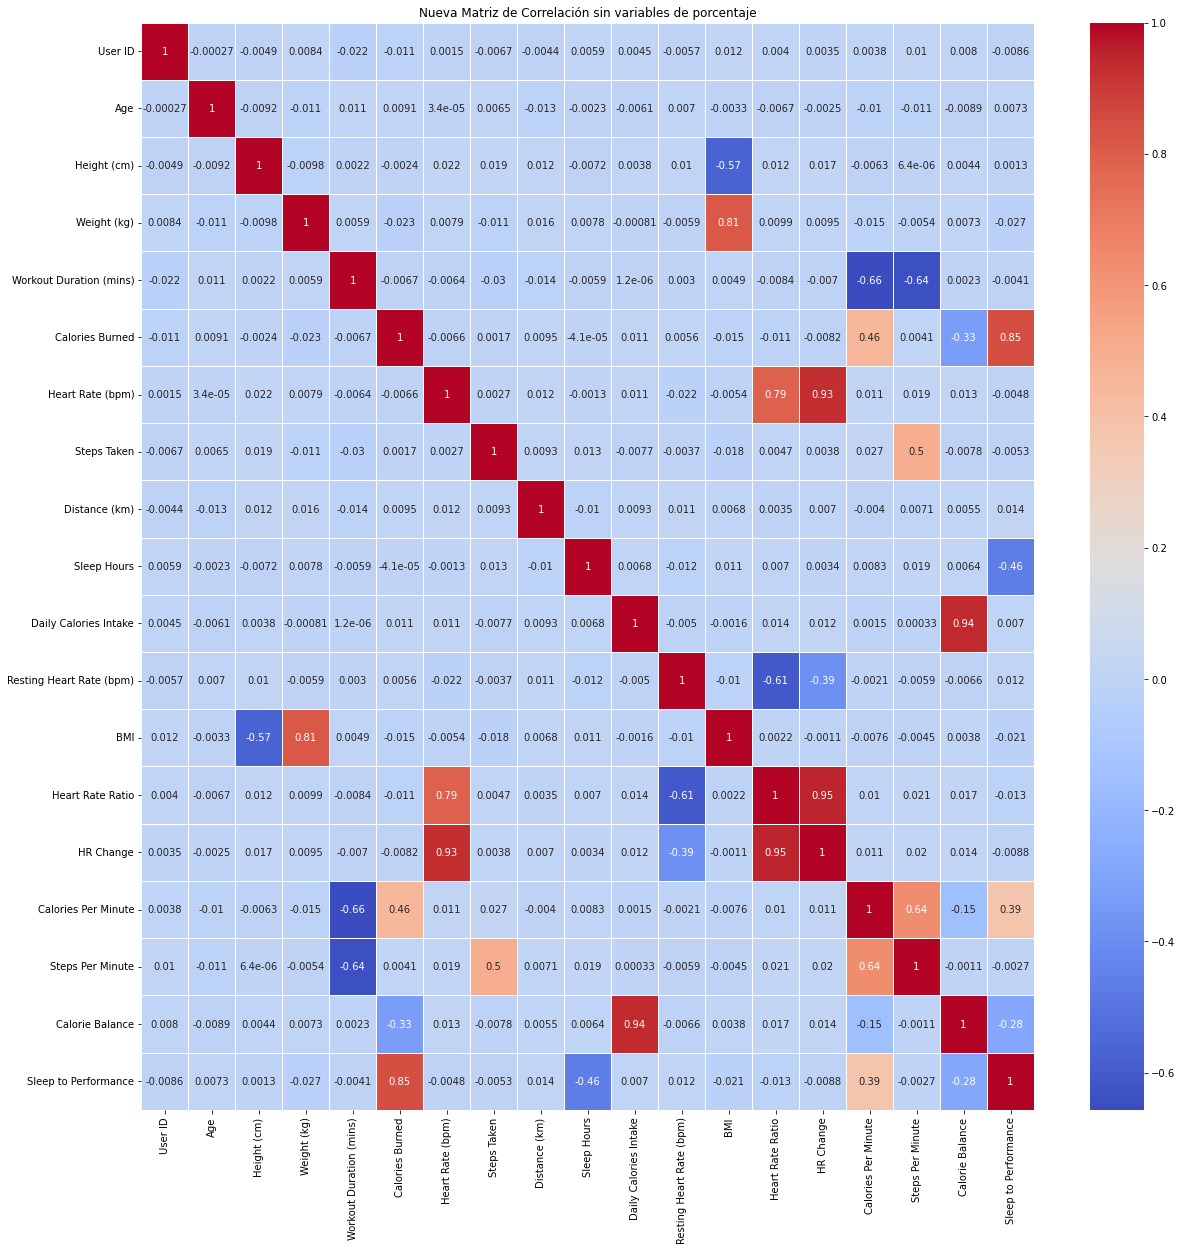

In [37]:
# Recalcular la matriz de correlación
correlation_matrix_filtered = df.corr()

# Visualizar la nueva matriz de correlación
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Nueva Matriz de Correlación sin variables de porcentaje')
plt.show()

Correlaciones fuertes:
                          User ID  Age  Height (cm)  Weight (kg)  \
User ID                       1.0  NaN          NaN          NaN   
Age                           NaN  1.0          NaN          NaN   
Height (cm)                   NaN  NaN          1.0          NaN   
Weight (kg)                   NaN  NaN          NaN     1.000000   
Workout Duration (mins)       NaN  NaN          NaN          NaN   
Calories Burned               NaN  NaN          NaN          NaN   
Heart Rate (bpm)              NaN  NaN          NaN          NaN   
Steps Taken                   NaN  NaN          NaN          NaN   
Distance (km)                 NaN  NaN          NaN          NaN   
Sleep Hours                   NaN  NaN          NaN          NaN   
Daily Calories Intake         NaN  NaN          NaN          NaN   
Resting Heart Rate (bpm)      NaN  NaN          NaN          NaN   
BMI                           NaN  NaN          NaN     0.812474   
Heart Rate Ratio         

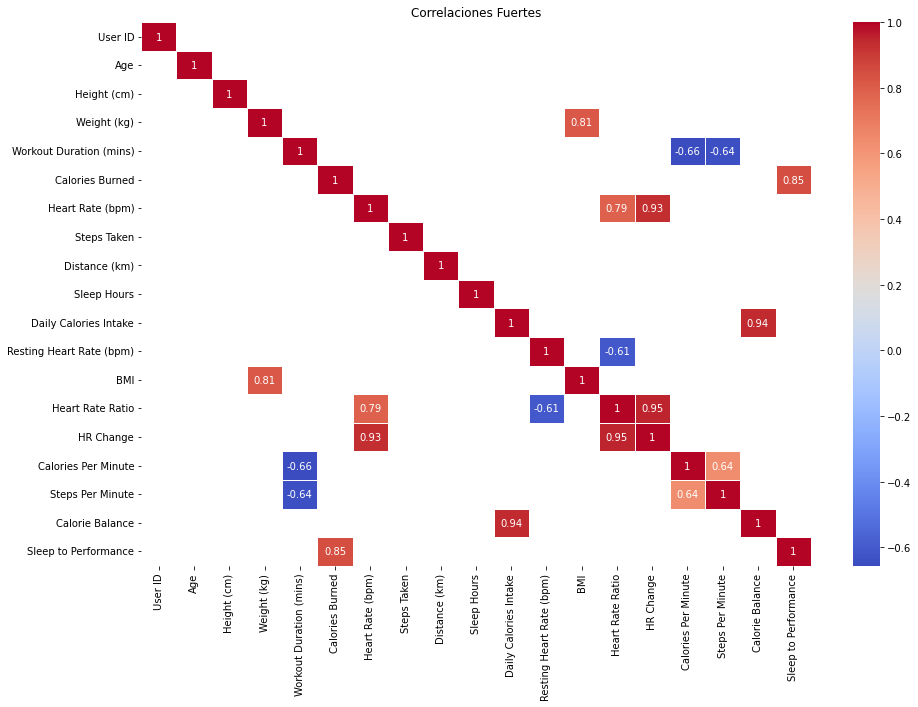

In [41]:
# Umbral para considerar una correlación como fuerte
threshold = 0.6

# Filtrar las correlaciones fuertes
strong_correlations = correlation_matrix_filtered[(correlation_matrix_filtered >= threshold) | (correlation_matrix_filtered <= -threshold)]

# Mostrar las correlaciones fuertes
print("Correlaciones fuertes:")
print(strong_correlations)

# Visualizar las correlaciones fuertes
plt.figure(figsize=(15, 10))
sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlaciones Fuertes')
plt.show()

Estas correlaciones fuertes nos dan indicios de cuales pueden ser las variables mas importantes para un futuro modelo